In [70]:
## This is my Week4 Individual Coding assignment. I am Rodrigo Gutierrez, my group is Annie Chan, Miles Kim Parr, Aydin Pasebani
## and Max Garcia. We are looking at Park Equity in Los Angeles,I am focusing on Rent/Homelessness.

In [71]:
## In this assignment, I learned more about how to join my datasets together through GEO_ID as well as trying some graphs
## in attempts of visualizing it.

In [68]:
## First importing my libraries in.

In [49]:
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt
import seaborn as sns

In [72]:
## Reading in my rent file, reading in "GEO_ID" as a string in order to be able to jjoin with other GEO_IDs.
## I also noticed that it had no leading 0 so I put the line of code for it to do so.

In [73]:
rent = pd.read_csv('week5/rentdata.csv',
dtype=
    {
        'GEO_ID':str,
    }
)
rent['GEO_ID'] = rent['GEO_ID'].str.zfill(11)
rent

,GEO_ID,NAME,Gross Rent
0,06037101110,"Census Tract 1011.10, Los Angeles County, Cali...",1689
1,06037101122,"Census Tract 1011.22, Los Angeles County, Cali...",2529
2,06037101220,"Census Tract 1012.20, Los Angeles County, Cali...",1324
3,06037101221,"Census Tract 1012.21, Los Angeles County, Cali...",1484
4,06037101222,"Census Tract 1012.22, Los Angeles County, Cali...",1525
...,...,...,...
2493,06037980038,"Census Tract 9800.38, Los Angeles County, Cali...",-
2494,06037980039,"Census Tract 9800.39, Los Angeles County, Cali...",-
2495,06037990100,"Census Tract 9901, Los Angeles County, California",-
2496,06037990200,"Census Tract 9902, Los Angeles County, California",-


In [ ]:
## Did the same for this cell, reading in homeless counts, reading in TractNum as a str, I will turn this into the GEO_ID.

In [74]:
unhoused_count = pd.read_csv('week5/unhoused.csv',
    dtype =
    {
        'TractNum':str,
    }
)
unhoused_count.head()

,TractNum,Location,Total Unsheltered,Total Sheltered,Total Population
0,101110,Sunland-Tujunga NC,12.614,0,12.614
1,101122,Sunland-Tujunga NC,1.000,0,1.000
2,101210,Sunland-Tujunga NC,14.517,0,14.517
3,101220,Sunland-Tujunga NC,24.058,0,24.058
4,101300,Sunland-Tujunga NC,9.278,0,9.278


In [75]:
## Here I am turning the Tract Num into a GEO_ID which is important for the merge.

In [52]:
unhoused_count['GEO_ID'] = '06' + '037' + unhoused_count['TractNum']
unhoused_count

,TractNum,Location,Total Unsheltered,Total Sheltered,Total Population,GEO_ID
0,101110,Sunland-Tujunga NC,12.614,0,12.614,06037101110
1,101122,Sunland-Tujunga NC,1.000,0,1.000,06037101122
2,101210,Sunland-Tujunga NC,14.517,0,14.517,06037101210
3,101220,Sunland-Tujunga NC,24.058,0,24.058,06037101220
4,101300,Sunland-Tujunga NC,9.278,0,9.278,06037101300
...,...,...,...,...,...,...
2158,980025,Carson,32.028,0,32.028,06037980025
2159,980026,Sunland-Tujunga NC,0.000,0,0.000,06037980026
2160,980028,Westchester/Playa NC,130.400,0,130.400,06037980028
2161,980030,El Segundo,4.961,0,4.961,06037980030


In [ ]:
## Reading in District 2 data here, CT20 as a string, will turn into GEO_ID.

In [53]:
District2 = pd.read_csv('week5/District2 (1).csv',
    dtype =
    {
        'CT20':str,
    }
)

In [ ]:
## Turning CT20 into the GEO_ID needed for merge.

In [54]:
District2['GEO_ID'] = '06' + '037' + District2['CT20']

In [ ]:
## Reading in District 5 data here, CT20 as a string, will turn this into GEO_ID.

In [55]:
District5= pd.read_csv('data/District5 (1) (1).csv',
    dtype =
    {
        'CT20':str,
    }
)

In [ ]:
## Turning CT20 into a string, will turn this into GEO_ID.

In [56]:
District5['GEO_ID'] = '06' + '037' + District2['CT20']

In [ ]:
## Merging rent and District 2 datas on "GEO_ID".

In [57]:
Dis2rent = District2.merge(rent, on ='GEO_ID')
Dis2rent.head()

,OBJECTID_12,Join_Count,TARGET_FID,CT20,LABEL,NAME_x,SUP_NAME,DIST_SUP,CITYNAME_ALF,NAME_1,JURISDICTION,AREA_NUM,AREA_NAME,Shape__Area,Shape__Length,GEO_ID,NAME_y,Gross Rent
0,640,2,640,211000,2110.00,2ND SUP. DISTRICT,2ND DISTRICT: HOLLY MITCHELL,2,LOS ANGELES,NaN,INCORPORATED CITY,5,Westside Planning Area,3.881413e+06,9270.888577,06037211000,"Census Tract 2110, Los Angeles County, California",2782
1,641,2,641,211121,2111.21,2ND SUP. DISTRICT,2ND DISTRICT: HOLLY MITCHELL,2,LOS ANGELES,NaN,INCORPORATED CITY,9,Metro Planning Area,3.125745e+05,2799.117227,06037211121,"Census Tract 2111.21, Los Angeles County, Cali...",1683
2,642,3,642,211122,2111.22,2ND SUP. DISTRICT,2ND DISTRICT: HOLLY MITCHELL,2,LOS ANGELES,NaN,INCORPORATED CITY,9,Metro Planning Area,5.341218e+05,3050.487937,06037211122,"Census Tract 2111.22, Los Angeles County, Cali...",1701
3,643,2,643,211123,2111.23,2ND SUP. DISTRICT,2ND DISTRICT: HOLLY MITCHELL,2,LOS ANGELES,NaN,INCORPORATED CITY,9,Metro Planning Area,2.513022e+05,2501.035059,06037211123,"Census Tract 2111.23, Los Angeles County, Cali...",2432
4,644,2,644,211124,2111.24,2ND SUP. DISTRICT,2ND DISTRICT: HOLLY MITCHELL,2,LOS ANGELES,NaN,INCORPORATED CITY,9,Metro Planning Area,5.771177e+05,3012.923477,06037211124,"Census Tract 2111.24, Los Angeles County, Cali...",1606


In [ ]:
## Doing the same here but with District 5.

In [58]:
Dis5rent = District5.merge(rent, on ='GEO_ID')
Dis5rent.head()

,OBJECTID_12,Join_Count,TARGET_FID,CT20,LABEL,NAME_x,SUP_NAME,DIST_SUP,CITYNAME_ALF,NAME_1,JURISDICTION,AREA_NUM,AREA_NAME,Shape__Area,Shape__Length,GEO_ID,NAME_y,Gross Rent
0,1,1,1,101110,1011.10,5TH SUP. DISTRICT,5TH DISTRICT: KATHRYN BARGER,5,LOS ANGELES,NaN,INCORPORATED CITY,3,San Fernando Valley Planning Area,1.676519e+06,5565.411341,06037211000,"Census Tract 2110, Los Angeles County, California",2782
1,2,1,2,101122,1011.22,5TH SUP. DISTRICT,5TH DISTRICT: KATHRYN BARGER,5,LOS ANGELES,NaN,INCORPORATED CITY,3,San Fernando Valley Planning Area,3.881001e+06,11695.304277,06037211121,"Census Tract 2111.21, Los Angeles County, Cali...",1683
2,3,1,3,101220,1012.20,5TH SUP. DISTRICT,5TH DISTRICT: KATHRYN BARGER,5,LOS ANGELES,NaN,INCORPORATED CITY,3,San Fernando Valley Planning Area,1.025452e+06,4688.607147,06037211122,"Census Tract 2111.22, Los Angeles County, Cali...",1701
3,4,1,4,101221,1012.21,5TH SUP. DISTRICT,5TH DISTRICT: KATHRYN BARGER,5,LOS ANGELES,NaN,INCORPORATED CITY,3,San Fernando Valley Planning Area,5.197057e+05,3378.824327,06037211123,"Census Tract 2111.23, Los Angeles County, Cali...",2432
4,5,1,5,101222,1012.22,5TH SUP. DISTRICT,5TH DISTRICT: KATHRYN BARGER,5,LOS ANGELES,NaN,INCORPORATED CITY,3,San Fernando Valley Planning Area,4.350619e+05,3685.233312,06037211124,"Census Tract 2111.24, Los Angeles County, Cali...",1606


In [ ]:
## Now merging the homeless count with District 2.

In [59]:
Dis2unhoused = District2.merge(unhoused_count, on ='GEO_ID')
Dis2unhoused.head()

,OBJECTID_12,Join_Count,TARGET_FID,CT20,LABEL,NAME,SUP_NAME,DIST_SUP,CITYNAME_ALF,NAME_1,...,AREA_NUM,AREA_NAME,Shape__Area,Shape__Length,GEO_ID,TractNum,Location,Total Unsheltered,Total Sheltered,Total Population
0,640,2,640,211000,2110.00,2ND SUP. DISTRICT,2ND DISTRICT: HOLLY MITCHELL,2,LOS ANGELES,NaN,...,5,Westside Planning Area,3.881413e+06,9270.888577,06037211000,211000,Greater Wilshire NC,9.331,27,36.331
1,641,2,641,211121,2111.21,2ND SUP. DISTRICT,2ND DISTRICT: HOLLY MITCHELL,2,LOS ANGELES,NaN,...,9,Metro Planning Area,3.125745e+05,2799.117227,06037211121,211121,Rampart Village NC,140.100,0,140.100
2,642,3,642,211122,2111.22,2ND SUP. DISTRICT,2ND DISTRICT: HOLLY MITCHELL,2,LOS ANGELES,NaN,...,9,Metro Planning Area,5.341218e+05,3050.487937,06037211122,211122,Rampart Village NC,123.470,0,123.470
3,645,2,645,211201,2112.01,2ND SUP. DISTRICT,2ND DISTRICT: HOLLY MITCHELL,2,LOS ANGELES,NaN,...,9,Metro Planning Area,2.036427e+05,1811.419313,06037211201,211201,Wilshire Center-Koreatown NC,1.427,0,1.427
4,646,3,646,211202,2112.02,2ND SUP. DISTRICT,2ND DISTRICT: HOLLY MITCHELL,2,LOS ANGELES,NaN,...,9,Metro Planning Area,2.617965e+05,2048.091994,06037211202,211202,Wilshire Center-Koreatown NC,11.762,0,11.762


In [76]:
## Now doing the same, but with District 5.

In [60]:
Dis5unhoused = District5.merge(unhoused_count, on ='GEO_ID')
Dis5unhoused.head()

,OBJECTID_12,Join_Count,TARGET_FID,CT20,LABEL,NAME,SUP_NAME,DIST_SUP,CITYNAME_ALF,NAME_1,...,AREA_NUM,AREA_NAME,Shape__Area,Shape__Length,GEO_ID,TractNum,Location,Total Unsheltered,Total Sheltered,Total Population
0,1,1,1,101110,1011.10,5TH SUP. DISTRICT,5TH DISTRICT: KATHRYN BARGER,5,LOS ANGELES,NaN,...,3,San Fernando Valley Planning Area,1.676519e+06,5565.411341,06037211000,211000,Greater Wilshire NC,9.331,27,36.331
1,2,1,2,101122,1011.22,5TH SUP. DISTRICT,5TH DISTRICT: KATHRYN BARGER,5,LOS ANGELES,NaN,...,3,San Fernando Valley Planning Area,3.881001e+06,11695.304277,06037211121,211121,Rampart Village NC,140.100,0,140.100
2,3,1,3,101220,1012.20,5TH SUP. DISTRICT,5TH DISTRICT: KATHRYN BARGER,5,LOS ANGELES,NaN,...,3,San Fernando Valley Planning Area,1.025452e+06,4688.607147,06037211122,211122,Rampart Village NC,123.470,0,123.470
3,6,1,6,101300,1013.00,5TH SUP. DISTRICT,5TH DISTRICT: KATHRYN BARGER,5,LOS ANGELES,NaN,...,3,San Fernando Valley Planning Area,3.786001e+06,10858.706120,06037211201,211201,Wilshire Center-Koreatown NC,1.427,0,1.427
4,7,1,7,101400,1014.00,5TH SUP. DISTRICT,5TH DISTRICT: KATHRYN BARGER,5,LOS ANGELES,NaN,...,3,San Fernando Valley Planning Area,9.256641e+06,15739.594223,06037211202,211202,Wilshire Center-Koreatown NC,11.762,0,11.762


In [77]:
## Merging rent with Dis2_unhoused to have all three data sets together, on "GEO_ID".

In [78]:
Dis2renthome = Dis2unhoused.merge(rent, on ='GEO_ID')
Dis2renthome.head()

,OBJECTID_12,Join_Count,TARGET_FID,CT20,LABEL,NAME_x,SUP_NAME,DIST_SUP,CITYNAME_ALF,NAME_1,...,Shape__Area,Shape__Length,GEO_ID,TractNum,Location,Total Unsheltered,Total Sheltered,Total Population,NAME_y,Gross Rent
0,640,2,640,211000,2110.00,2ND SUP. DISTRICT,2ND DISTRICT: HOLLY MITCHELL,2,LOS ANGELES,NaN,...,3.881413e+06,9270.888577,06037211000,211000,Greater Wilshire NC,9.331,27,36.331,"Census Tract 2110, Los Angeles County, California",2782
1,641,2,641,211121,2111.21,2ND SUP. DISTRICT,2ND DISTRICT: HOLLY MITCHELL,2,LOS ANGELES,NaN,...,3.125745e+05,2799.117227,06037211121,211121,Rampart Village NC,140.100,0,140.100,"Census Tract 2111.21, Los Angeles County, Cali...",1683
2,642,3,642,211122,2111.22,2ND SUP. DISTRICT,2ND DISTRICT: HOLLY MITCHELL,2,LOS ANGELES,NaN,...,5.341218e+05,3050.487937,06037211122,211122,Rampart Village NC,123.470,0,123.470,"Census Tract 2111.22, Los Angeles County, Cali...",1701
3,645,2,645,211201,2112.01,2ND SUP. DISTRICT,2ND DISTRICT: HOLLY MITCHELL,2,LOS ANGELES,NaN,...,2.036427e+05,1811.419313,06037211201,211201,Wilshire Center-Koreatown NC,1.427,0,1.427,"Census Tract 2112.01, Los Angeles County, Cali...",1539
4,646,3,646,211202,2112.02,2ND SUP. DISTRICT,2ND DISTRICT: HOLLY MITCHELL,2,LOS ANGELES,NaN,...,2.617965e+05,2048.091994,06037211202,211202,Wilshire Center-Koreatown NC,11.762,0,11.762,"Census Tract 2112.02, Los Angeles County, Cali...",1182


In [79]:
## Merging rent with District 5 unhoused population, on 'GEO_ID'.

In [80]:
Dis5renthome = Dis5unhoused.merge(rent, on ='GEO_ID')
Dis5renthome.head()

,OBJECTID_12,Join_Count,TARGET_FID,CT20,LABEL,NAME_x,SUP_NAME,DIST_SUP,CITYNAME_ALF,NAME_1,...,Shape__Area,Shape__Length,GEO_ID,TractNum,Location,Total Unsheltered,Total Sheltered,Total Population,NAME_y,Gross Rent
0,1,1,1,101110,1011.10,5TH SUP. DISTRICT,5TH DISTRICT: KATHRYN BARGER,5,LOS ANGELES,NaN,...,1.676519e+06,5565.411341,06037211000,211000,Greater Wilshire NC,9.331,27,36.331,"Census Tract 2110, Los Angeles County, California",2782
1,2,1,2,101122,1011.22,5TH SUP. DISTRICT,5TH DISTRICT: KATHRYN BARGER,5,LOS ANGELES,NaN,...,3.881001e+06,11695.304277,06037211121,211121,Rampart Village NC,140.100,0,140.100,"Census Tract 2111.21, Los Angeles County, Cali...",1683
2,3,1,3,101220,1012.20,5TH SUP. DISTRICT,5TH DISTRICT: KATHRYN BARGER,5,LOS ANGELES,NaN,...,1.025452e+06,4688.607147,06037211122,211122,Rampart Village NC,123.470,0,123.470,"Census Tract 2111.22, Los Angeles County, Cali...",1701
3,6,1,6,101300,1013.00,5TH SUP. DISTRICT,5TH DISTRICT: KATHRYN BARGER,5,LOS ANGELES,NaN,...,3.786001e+06,10858.706120,06037211201,211201,Wilshire Center-Koreatown NC,1.427,0,1.427,"Census Tract 2112.01, Los Angeles County, Cali...",1539
4,7,1,7,101400,1014.00,5TH SUP. DISTRICT,5TH DISTRICT: KATHRYN BARGER,5,LOS ANGELES,NaN,...,9.256641e+06,15739.594223,06037211202,211202,Wilshire Center-Koreatown NC,11.762,0,11.762,"Census Tract 2112.02, Los Angeles County, Cali...",1182


In [ ]:
## Let's visualize all three datasets together. Doesn't look too good.

<Axes: >

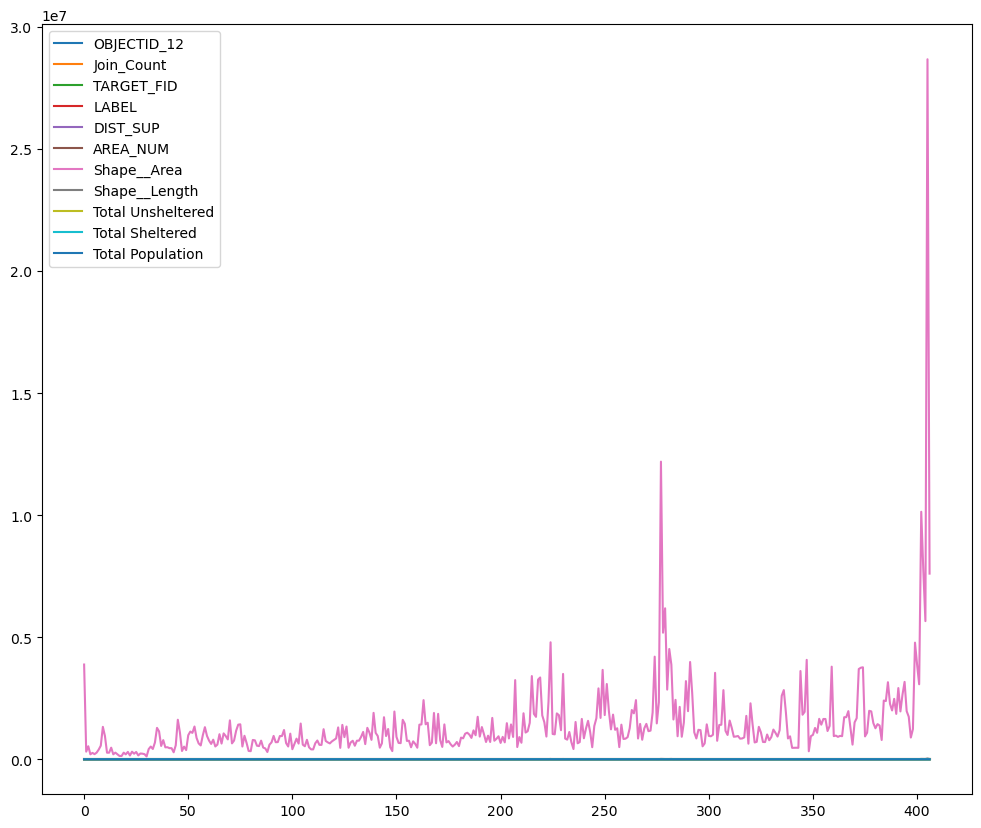

In [63]:
Dis2renthome.plot(figsize=(12,10),
                 column='Gross Rent',
                 legend=True, 
                 )

In [81]:
## Let's try just the number of homeless people. Doesn't look too good either.

<Axes: >

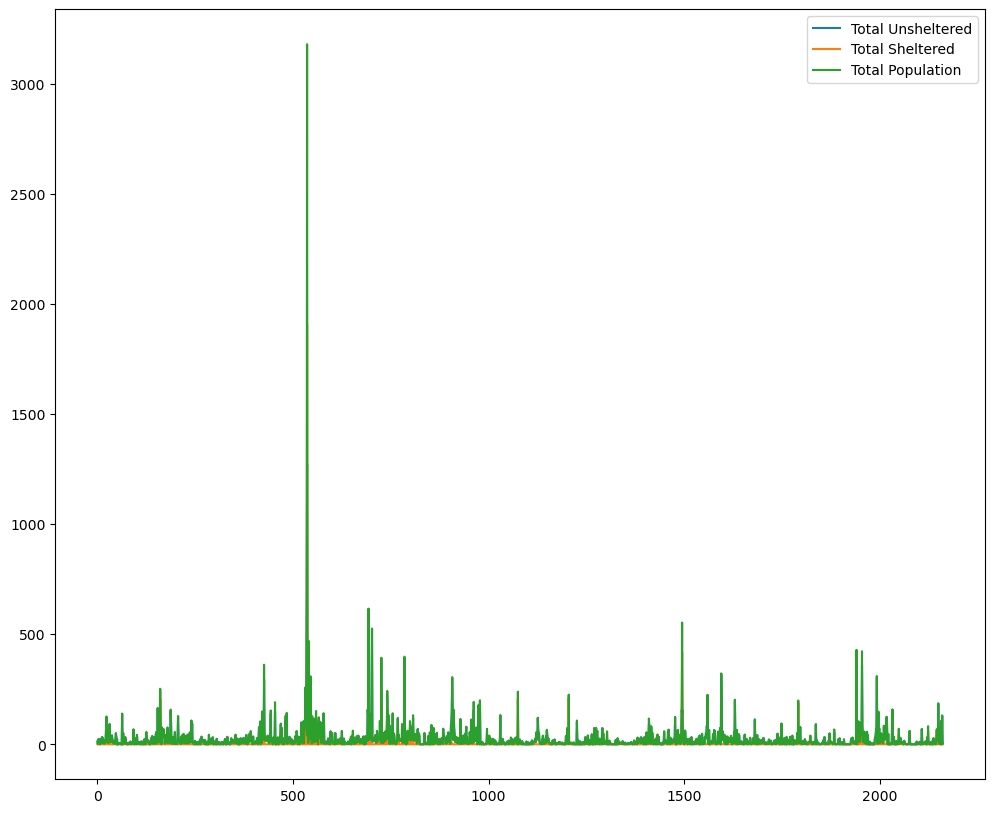

In [66]:
unhoused_count.plot(figsize=(12,10),
                 column='Total Population',
                 legend=True, 
                 )

In [ ]:
## What about district 5, rent, and homeless population? Looks similar to graph above.

<Axes: >

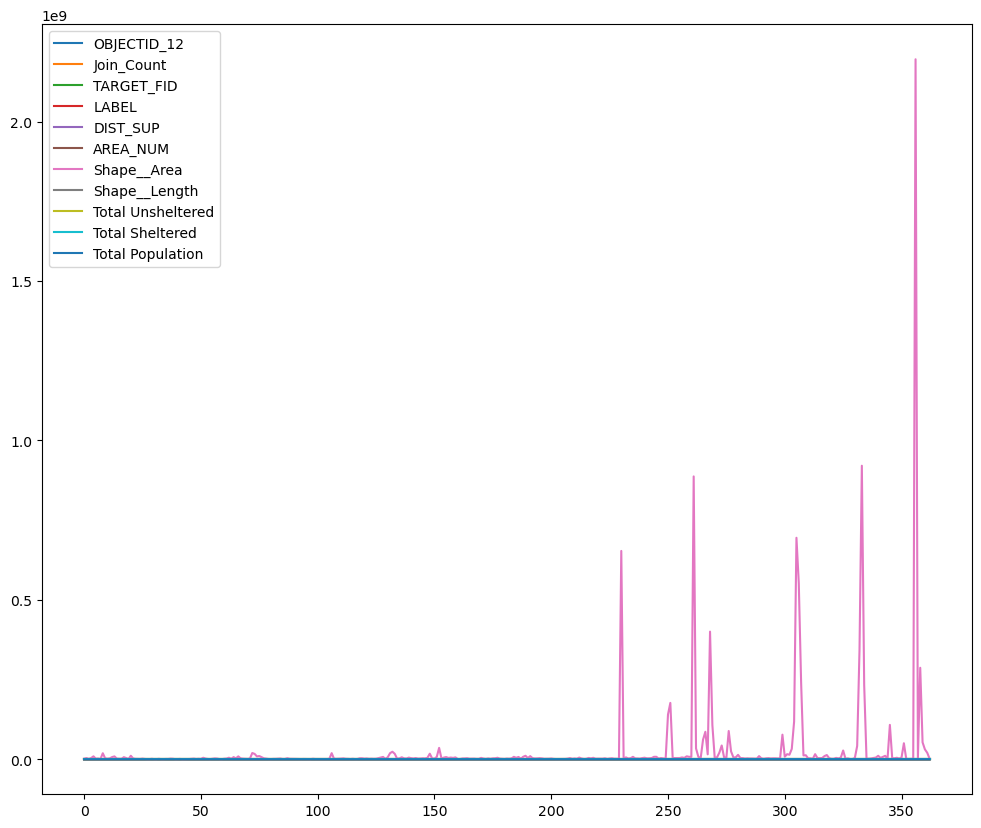

In [64]:
Dis5renthome.plot(figsize=(12,10),
                 column='Gross Rent',
                 legend=True, 
                 )

In [ ]:
## What about just rent in District 2? Looks the same as well.

<Axes: >

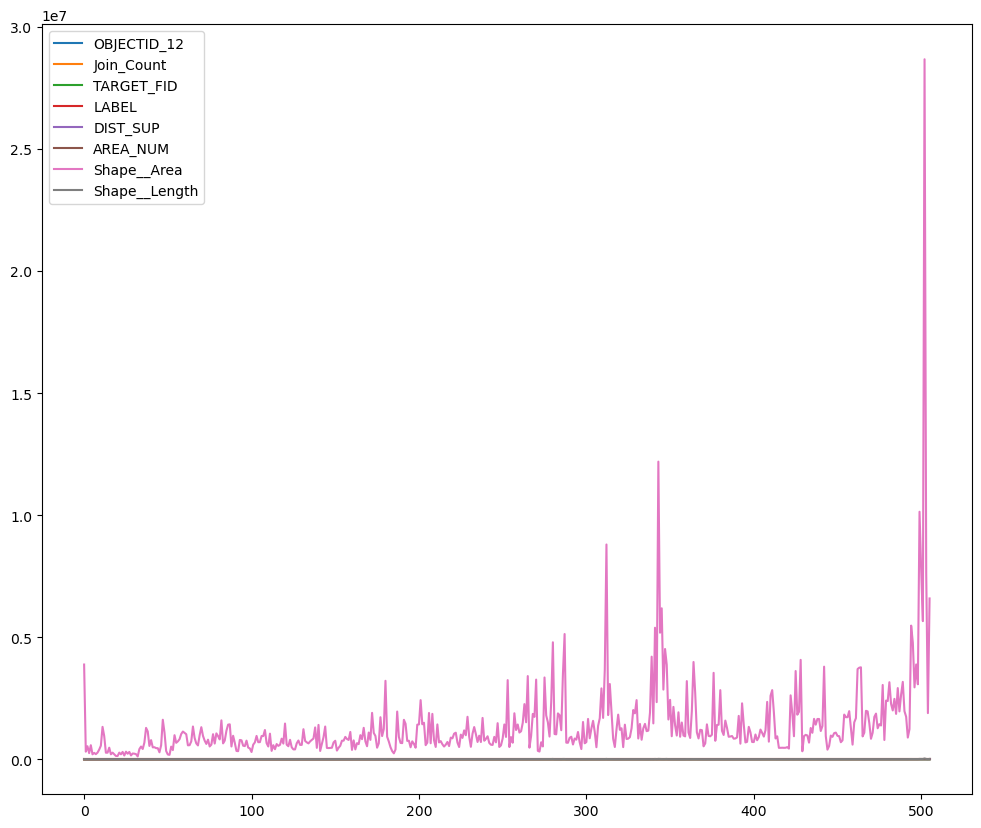

In [67]:
Dis2rent.plot(figsize=(12,10),
                 column='Gross Rent',
                 legend=True, 
                 )

In [ ]:
## In conclusion, I think my merges came out the way I wanted, I was able to combine them through GEO_ID which I think was 
## the hardest part. I think I need to clean my data or choose a certain column so that the graphs come out a bit better.